# Exploración del Teorema de Marchenko-Pastur para Mejorar la Capacidad Predictiva mediante la Limpieza de la Matriz de Covarianza

## Objetivos

1. **Introducción al Teorema de Marchenko-Pastur**:
   - Explicar brevemente el teorema y su relevancia en la teoría de matrices aleatorias.
   - Describir cómo este teorema se puede aplicar en la limpieza de la matriz de covarianza.

2. **Implementación de la Limpieza de la Matriz de Covarianza**:
   - Mostrar el proceso de cálculo de la matriz de covarianza de un conjunto de datos.
   - Aplicar el teorema de Marchenko-Pastur para identificar y eliminar el ruido en la matriz de covarianza.

3. **Evaluación del Impacto en la Capacidad Predictiva del Modelo**:
   - Comparar la capacidad predictiva de un modelo antes y después de la limpieza de la matriz de covarianza.
   - Medir la mejora en el desempeño del modelo utilizando métricas clave como precisión, recall, o área bajo la curva (AUC).

4. **Conclusiones y Recomendaciones**:
   - Resumir los hallazgos obtenidos a partir de la implementación del teorema de Marchenko-Pastur.
   - Sugerir aplicaciones prácticas y futuras direcciones para la mejora de modelos predictivos utilizando este enfoque.


In [1]:
import pandas as pd

In [2]:
# Load train and test data from CSV files
df = pd.read_csv('../data/train.csv')

# Split the data into train and test data
train_data = df.sample(frac=0.8, random_state=0)
test_data = df.drop(train_data.index)

# Display the first few rows of the train data
display(train_data.head())
print(train_data.info())
print(train_data.shape)

,id,area,bathrooms,bedrooms,condo_fee,parking_spots,attached_rooms,type,lat,lon,year_built,overall_condition,has_elevator,leasures_available,price
914,461,54,2.0,2.0,230.0,1.0,1.0,apartment,-5.882136,-35.172217,NaN,Score 2,yes,playground,215000
3121,4377,86,1.0,3.0,450.0,2.0,1.0,apartment,-5.822694,-35.212640,NaN,Score 5,y,"POOL,barbecue space,PLAYGROUND,sports court",450000
1900,2837,144,5.0,3.0,909.0,3.0,3.0,apartment,-5.801043,-35.204203,NaN,Score 5,y,NaN,800000
3070,377,98,3.0,3.0,728.0,2.0,1.0,apartment,-5.794185,-35.206400,1996.0,Score 6,no,"pool,playground",510000
572,828,360,3.0,3.0,0.0,3.0,3.0,house,-5.882136,-35.172217,1969.0,Score 5,yes,NaN,480000


<class 'pandas.core.frame.DataFrame'>
Index: 3245 entries, 914 to 1623
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3245 non-null   int64  
 1   area                3245 non-null   int64  
 2   bathrooms           3227 non-null   float64
 3   bedrooms            3221 non-null   float64
 4   condo_fee           3233 non-null   float64
 5   parking_spots       3235 non-null   float64
 6   attached_rooms      3234 non-null   float64
 7   type                3235 non-null   object 
 8   lat                 3234 non-null   float64
 9   lon                 3231 non-null   float64
 10  year_built          2022 non-null   float64
 11  overall_condition   3245 non-null   object 
 12  has_elevator        3245 non-null   object 
 13  leasures_available  2061 non-null   object 
 14  price               3245 non-null   int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 405.6+ KB

In [19]:
# Display the first few rows of the train data numeric columns
train_data_n = train_data.select_dtypes(exclude=['object']).drop(columns=['year_built', 'id', 'lon', 'lat'])
test_data_n = test_data.select_dtypes(exclude=['object']).drop(columns=['year_built', 'id', 'lon', 'lat'])
print(train_data_n.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3245 entries, 914 to 1623
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            3245 non-null   int64  
 1   bathrooms       3227 non-null   float64
 2   bedrooms        3221 non-null   float64
 3   condo_fee       3233 non-null   float64
 4   parking_spots   3235 non-null   float64
 5   attached_rooms  3234 non-null   float64
 6   price           3245 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 331.9 KB
None


In [20]:
# Fill missing values with the mean of the column
def fill_null_with_mean(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    return df

train_data_n = fill_null_with_mean(train_data_n)
test_data_n = fill_null_with_mean(test_data_n)

In [21]:
X_train = train_data_n.drop(columns=['price'])
y_train = train_data_n['price']

X_test = test_data_n.drop(columns=['price'])
y_test = test_data_n['price']

In [22]:
# Estandariza los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

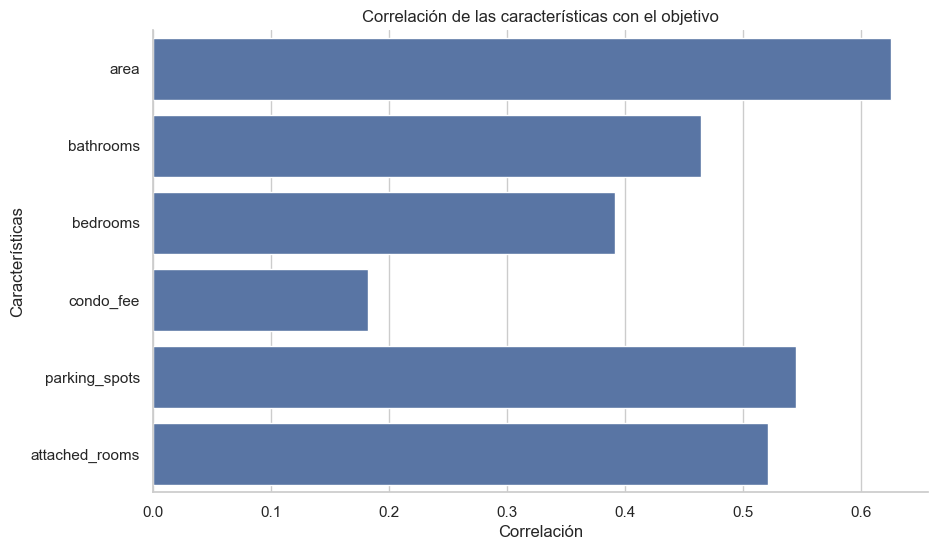

In [23]:
import seaborn as sns

import matplotlib.pyplot as plt

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Calcular la correlación de las características con el objetivo
correlation = X_train.corrwith(y_train)

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras horizontal
sns.barplot(x=correlation.values, y=correlation.index, orient='h', ax=ax)

# Personalizar el gráfico
ax.set_title('Correlación de las características con el objetivo')
ax.set_xlabel('Correlación')
ax.set_ylabel('Características')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostrar el gráfico
plt.show()


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Crear un modelo de regresión lineal
model_raw = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model_raw.fit(X_train, y_train)

# Predecir los precios de las viviendas en el conjunto de prueba
y_pred_raw = model_raw.predict(X_test)

# Calcular el error cuadrático medio
mse_raw = mean_squared_error(y_test, y_pred_raw)
print(f'Error cuadrático medio: {mse_raw:.2f}')

# Calcular el coeficiente de determinación
r2_raw = r2_score(y_test, y_pred_raw)
print(f'Coeficiente de determinación: {r2_raw:.2f}')

Error cuadrático medio: 23494338345.89
Coeficiente de determinación: 0.58


In [25]:
23´088,066.957

26´770,119.191


SyntaxError: invalid character '´' (U+00B4) (183020202.py, line 1)

In [26]:
import numpy as np

covariance_matrix = np.cov(X_train_st, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
print(eigenvalues)

[0.22351693 0.38797088 0.47634781 0.89067592 1.08663736 2.93670066]


In [27]:
# Calcula gamma
p = X_train_st.shape[1]  # número de variables (columnas)
n = X_train_st.shape[0]  # número de observaciones (filas)
gamma = p / n

In [28]:
# Calcula el umbral de Marchenko-Pastur
lambda_max = (1 + np.sqrt(gamma))**2

In [29]:
# Identifica los índices significativos
significant_indices = np.where(eigenvalues > lambda_max)[0]

base = eigenvectors[:, significant_indices]  # vectores propios seleccionados

# Proyecta los datos en el nuevo espacio
filtered_data = np.dot(np.dot(X_train_st, base), base.T)

filtered_data_test = np.dot(np.dot(X_test_st, base), base.T)

In [30]:
significant_indices

array([5])

In [31]:
# filtered_data_original_scale = scaler.inverse_transform(filtered_data)

In [32]:
model_filtered = LinearRegression()
model_filtered.fit(filtered_data, y_train)

# Predecir los precios de las viviendas en el conjunto de prueba
y_pred_filtered = model_filtered.predict(filtered_data_test)

# Calcular el error cuadrático medio
mse_raw = mean_squared_error(y_test, y_pred_filtered)
print(f'Error cuadrático medio: {mse_raw:.2f}')

# Calcular el coeficiente de determinación
r2_raw = r2_score(y_test, y_pred_filtered)
print(f'Coeficiente de determinación: {r2_raw:.2f}')

Error cuadrático medio: 26726313048.74
Coeficiente de determinación: 0.52


In [33]:
# convertir filtered_data en dataframe con columnas originales
filtered_data_df = pd.DataFrame(filtered_data, columns=X_train.columns)
filtered_data_df.head()

,area,bathrooms,bedrooms,condo_fee,parking_spots,attached_rooms
0,-0.412670,-0.534927,-0.487081,-0.165546,-0.452119,-0.531969
1,-0.139293,-0.180560,-0.164410,-0.055879,-0.152609,-0.179562
2,1.094210,1.418379,1.291514,0.438951,1.198810,1.410534
3,0.212838,0.275893,0.251216,0.085382,0.233184,0.274367
4,0.957607,1.241306,1.130279,0.384151,1.049148,1.234440


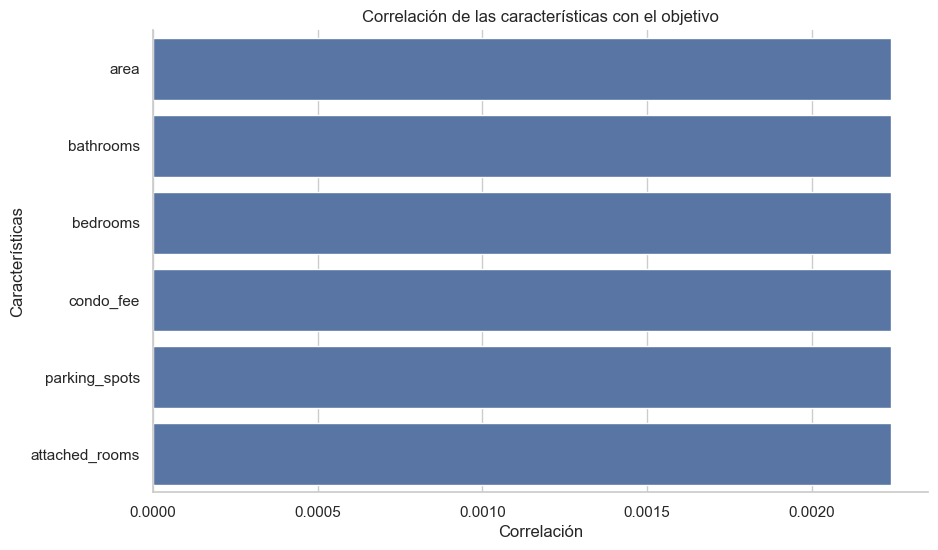

In [34]:
import seaborn as sns

import matplotlib.pyplot as plt

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Calcular la correlación de las características con el objetivo
correlation = filtered_data_df.corrwith(y_train)

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras horizontal
sns.barplot(x=correlation.values, y=correlation.index, orient='h', ax=ax)

# Personalizar el gráfico
ax.set_title('Correlación de las características con el objetivo')
ax.set_xlabel('Correlación')
ax.set_ylabel('Características')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostrar el gráfico
plt.show()


In [ ]:
### TODO: falta boostraping https://chatgpt.com/c/886369a2-d4a5-4570-a74f-9c4f02205c50